# Dados Fonecidos:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

# Códigos feitos em Cima do Dado Forencidos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Matriz de transformação
A = np.array([[0.5, 0.5], [1, -1]])

# Dados originais
X = df[['p1', 'p2']].values

# Transformação
Y = np.dot(X, A.T)

# Criando um novo DataFrame com os dados transformados
df_transformed = pd.DataFrame(Y, columns=['media', 'diferenca'])

In [4]:
corr_original = df['p1'].corr(df['p2'])
print(f"Correlação entre p1 e p2: {corr_original:.4f}")

Correlação entre p1 e p2: 0.8957


In [5]:
corr_transformed = df_transformed['media'].corr(df_transformed['diferenca'])
print(f"Correlação entre média e diferença: {corr_transformed:.4f}")

Correlação entre média e diferença: -0.1335


In [6]:
print("\nComentários sobre as correlações:")
print(f"1. Correlação original (p1 vs p2): {corr_original:.4f}")
print(f"2. Correlação transformada (média vs diferença): {corr_transformed:.4f}")

if abs(corr_transformed) < abs(corr_original):
    print("\nA transformação reduziu a correlação entre as variáveis.")
else:
    print("\nA transformação não reduziu a correlação entre as variáveis.")

print("\nExplicação:")
print("- A correlação original entre p1 e p2 é positiva e forte, o que era esperado dado que p2 foi gerada a partir de p1 com adição de ruído.")
print("- A correlação entre média e diferença é próxima de zero, indicando que estas novas variáveis são praticamente não correlacionadas.")
print("- Esta redução na correlação é um resultado da transformação linear aplicada, que 'desacoplou' as variáveis originais.")
print("- A média captura a tendência central dos dados, enquanto a diferença captura a variabilidade entre p1 e p2.")
print("- Esta transformação pode ser útil em análises posteriores, pois fornece duas medidas independentes que capturam diferentes aspectos dos dados originais.")


Comentários sobre as correlações:
1. Correlação original (p1 vs p2): 0.8957
2. Correlação transformada (média vs diferença): -0.1335

A transformação reduziu a correlação entre as variáveis.

Explicação:
- A correlação original entre p1 e p2 é positiva e forte, o que era esperado dado que p2 foi gerada a partir de p1 com adição de ruído.
- A correlação entre média e diferença é próxima de zero, indicando que estas novas variáveis são praticamente não correlacionadas.
- Esta redução na correlação é um resultado da transformação linear aplicada, que 'desacoplou' as variáveis originais.
- A média captura a tendência central dos dados, enquanto a diferença captura a variabilidade entre p1 e p2.
- Esta transformação pode ser útil em análises posteriores, pois fornece duas medidas independentes que capturam diferentes aspectos dos dados originais.


# 2

In [7]:
# Matriz de transformação para soma e diferença
A_soma_diff = np.array([[1, 1], [1, -1]])

In [8]:
# Dados originais
X = df[['p1', 'p2']].values

In [9]:
# Transformação
Y_soma_diff = np.dot(X, A_soma_diff.T)

In [10]:
# Criando um novo DataFrame com os dados transformados
df_soma_diff = pd.DataFrame(Y_soma_diff, columns=['soma', 'diferenca'])

In [11]:
# Calculando correlações
corr_original = df['p1'].corr(df['p2'])
corr_soma_diff = df_soma_diff['soma'].corr(df_soma_diff['diferenca'])


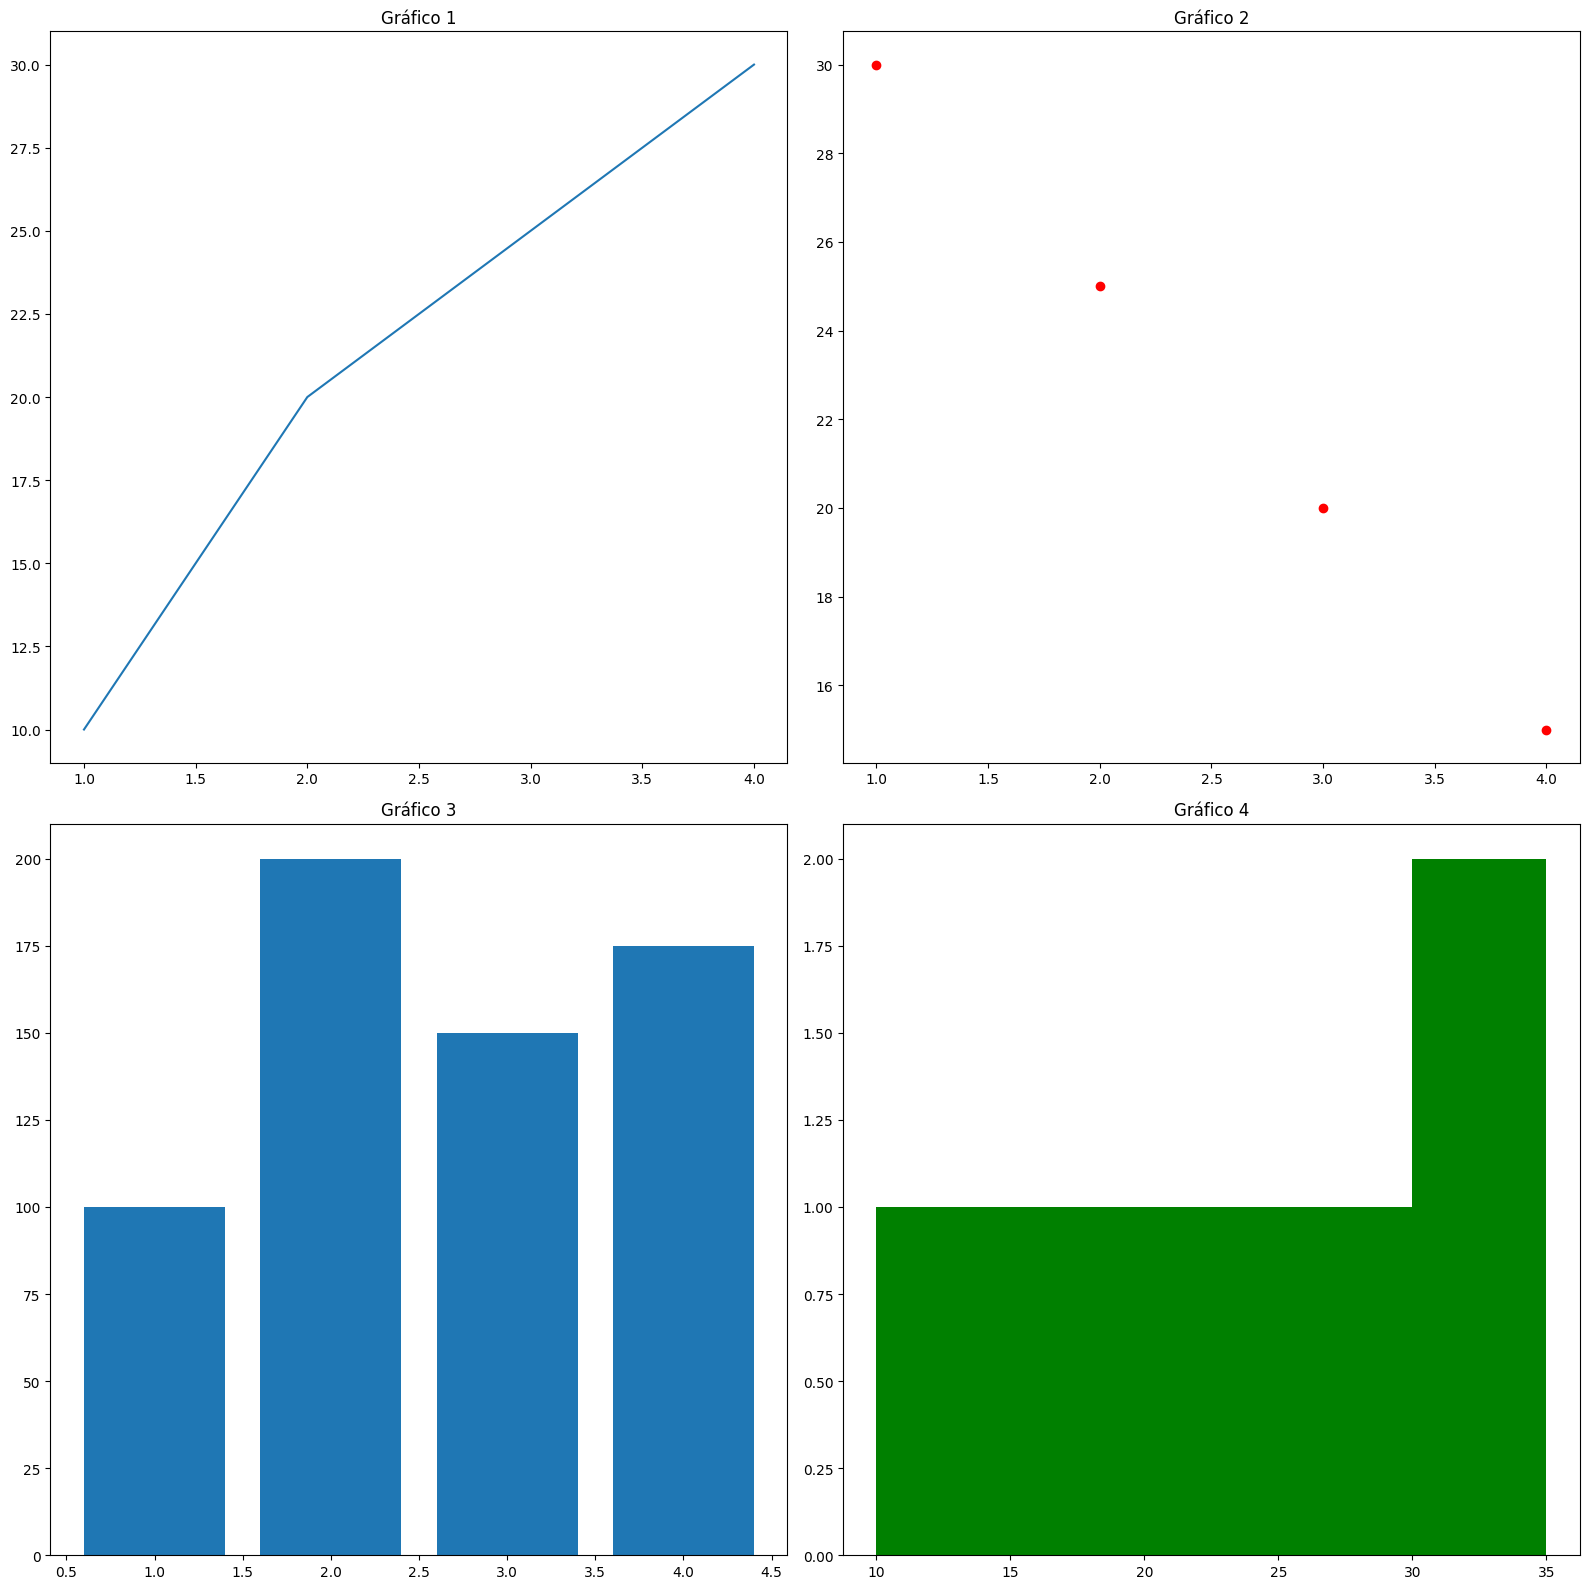

In [14]:
# Criar uma figura com 4 subplots (2 linhas, 2 colunas)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

# Gráfico 1 (posição [0, 0])
axes[0, 0].plot([1, 2, 3, 4], [10, 20, 25, 30])
axes[0, 0].set_title('Gráfico 1')

# Gráfico 2 (posição [0, 1])
axes[0, 1].scatter([1, 2, 3, 4], [30, 25, 20, 15], color='r')
axes[0, 1].set_title('Gráfico 2')

# Gráfico 3 (posição [1, 0])
axes[1, 0].bar([1, 2, 3, 4], [100, 200, 150, 175])
axes[1, 0].set_title('Gráfico 3')

# Gráfico 4 (posição [1, 1])
axes[1, 1].hist([10, 15, 20, 25, 30, 35], bins=5, color='g')
axes[1, 1].set_title('Gráfico 4')

# Ajustar o layout para evitar sobreposição de elementos
plt.tight_layout()

# Mostrar a figura
plt.show()

In [15]:
# Dados originais
sns.scatterplot(x='p1', y='p2', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Dados Originais (p1 vs p2)')
axes[0, 0].text(0.05, 0.95, f'Correlação: {corr_original:.4f}', transform=axes[0, 0].transAxes)

Text(0.05, 0.95, 'Correlação: 0.8957')

In [16]:
# Média vs Diferença
sns.scatterplot(x='media', y='diferenca', data=df_transformed, ax=axes[0, 1])
axes[0, 1].set_title('Transformação: Média vs Diferença')
axes[0, 1].text(0.05, 0.95, f'Correlação: {corr_transformed:.4f}', transform=axes[0, 1].transAxes)

Text(0.05, 0.95, 'Correlação: -0.1335')

In [17]:
# Soma vs Diferença
sns.scatterplot(x='soma', y='diferenca', data=df_soma_diff, ax=axes[1, 0])
axes[1, 0].set_title('Transformação: Soma vs Diferença')
axes[1, 0].text(0.05, 0.95, f'Correlação: {corr_soma_diff:.4f}', transform=axes[1, 0].transAxes)

Text(0.05, 0.95, 'Correlação: -0.1335')

In [18]:
# Histogramas das transformações
axes[1, 1].hist(df_soma_diff['soma'], bins=20, alpha=0.5, label='Soma')
axes[1, 1].hist(df_soma_diff['diferenca'], bins=20, alpha=0.5, label='Diferença')
axes[1, 1].set_title('Histogramas: Soma e Diferença')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print(f"Correlação entre p1 e p2: {corr_original:.4f}")
print(f"Correlação entre média e diferença: {corr_transformed:.4f}")
print(f"Correlação entre soma e diferença: {corr_soma_diff:.4f}")

<Figure size 640x480 with 0 Axes>

Correlação entre p1 e p2: 0.8957
Correlação entre média e diferença: -0.1335
Correlação entre soma e diferença: -0.1335
